# Final Project submision

#### Student Name : Lydia Njeri
#### Student Pace : Self paced
#### Instructor Name : Antonny Muiko 
#### Blog Post URL :


# Phase 3 project

#### The project aims to predict adverse health outcomes in older adults using patient data from the "Virtual Patient Models_Dataset1.csv." This data includes various health metrics, lifestyle factors, and historical information.



## problem

####  How can we predict the risk of hospitalization, frailty progression, and cognitive decline in older adults?

## Recommendations(approach)

#### 1. Data Preprocessing: Clean and prepare the data for analysis.
#### 2. Exploratory Data Analysis (EDA): Identify trends and correlations to find key predictors of health outcomes.
#### 3. Feature Engineering : transforming existing data to extract more information
#### 4. Model Development: Use machine learning models to predict outcomes like hospitalization risk and frailty progression.
#### 5. Insights and Report: Interpret model results to provide actionable insights for healthcare providers.




## Objective

#### Objective: The project seeks to create a predictive tool that can help healthcare providers identify at-risk patients and recommend preventive measures.








### The success of the project can be measured using several key metrics across different stages:



#### 1. model performance metrics
#### 2. model interpretability and insights
#### 3. cross validation and generalization
#### 4. clinical impacts metrics
#### 5. usability and deployment metrics

## 1. Data processing

In [80]:

#1.1 Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r"C:\Users\ELITEBOOK 840 G3\Documents\moringa_labs\phase 3 project\Virtual Patient Models_Dataset1.csv")

In [38]:
#1.2 Display a summary of the dataset
print("Dataset Summary:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          117 non-null    float64
 1   clinical_visit                   117 non-null    float64
 2   fried                            117 non-null    int32  
 3   gender                           117 non-null    int32  
 4   q_date                           117 non-null    int32  
 5   age                              117 non-null    float64
 6   comorbidities_most_important     117 non-null    int32  
 7   hospitalization_one_year         117 non-null    float64
 8   hospitalization_three_years      117 non-null    float64
 9   ortho_hypotension                117 non-null    int32  
 10  vision                           117 non-null    int32  
 11  audition                         117 non-null    int32  
 12  weigh

In [39]:
#1.3 Handle Missing Values
# fill missing numerical values with the median and categorical with the mode
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Fill missing values
for col in numerical_features:
    data[col].fillna(data[col].median(), inplace=True)

for col in categorical_features:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [12]:
# Normalize Continuous Variables
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encode Categorical Variables
encoder = LabelEncoder()
for col in categorical_features:
    data[col] = encoder.fit_transform(data[col])

In [13]:
# Show the first few rows of the processed dataset
print("\nProcessed Data:")
print(data.head())

# Save the cleaned and preprocessed data to a new CSV file for future use
data.to_csv(r'C:\Users\ELITEBOOK 840 G3\Documents\moringa_labs\phase 3 project\Virtual Patient Models_Dataset1.csv', index=False)


Processed Data:
    part_id  clinical_visit  fried  gender  q_date       age  \
0 -0.977145       -1.321656      2       1       2  0.367728   
1 -0.977145       -0.417365      2       1      51  0.656480   
2 -0.977145        0.486926      2       1      66  0.656480   
3 -0.977145        1.391217      2       1      86  0.945233   
4 -0.975239       -1.321656      1       0       4 -1.364787   

   comorbidities_most_important  hospitalization_one_year  \
0                             1                 -0.412927   
1                             1                 -0.412927   
2                             1                 -0.412927   
3                             1                 -0.412927   
4                             1                  1.312519   

   hospitalization_three_years  ortho_hypotension  ...  pain_perception  \
0                    -0.722995                  0  ...        -0.564246   
1                    -0.722995                  0  ...        -0.654372   
2     

## 2. Exploratory Data Analysis

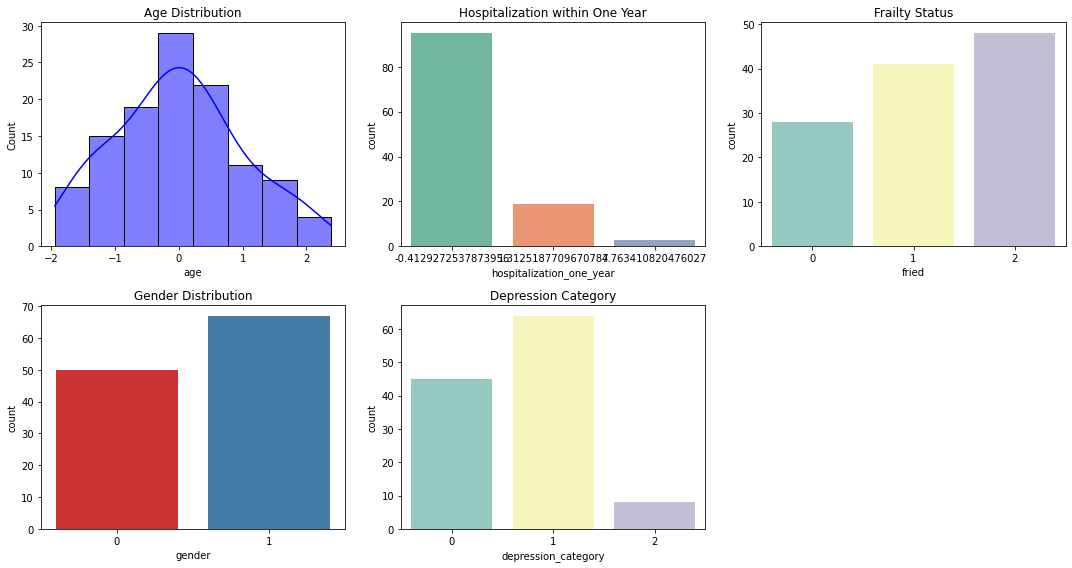

In [40]:

# 2.1 Visualize the Distribution of Key Variables
plt.figure(figsize=(15, 8))

# Plot the distribution of age
plt.subplot(2, 3, 1)
sns.histplot(data['age'], kde=True, color='blue')
plt.title('Age Distribution')

# Plot the distribution of hospitalization within one year
plt.subplot(2, 3, 2)
sns.countplot(x='hospitalization_one_year', data=data, palette='Set2')
plt.title('Hospitalization within One Year')

# Plot the distribution of frailty status (fried)
plt.subplot(2, 3, 3)
sns.countplot(x='fried', data=data, palette='Set3')
plt.title('Frailty Status')

# Plot the distribution of gender
plt.subplot(2, 3, 4)
sns.countplot(x='gender', data=data, palette='Set1')
plt.title('Gender Distribution')

# Plot the distribution of depression category
plt.subplot(2, 3, 5)
sns.countplot(x='depression_category', data=data, palette='Set3')
plt.title('Depression Category')

plt.tight_layout()
plt.show()




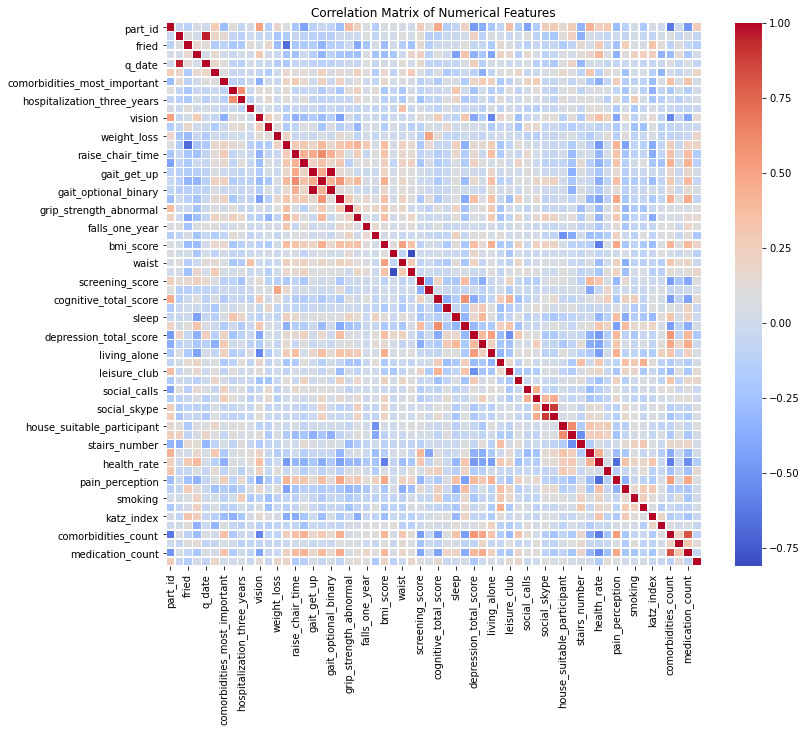

Highly Correlated Features:
                                  part_id  clinical_visit     fried  gender  \
part_id                          1.000000             NaN       NaN     NaN   
clinical_visit                        NaN        1.000000       NaN     NaN   
fried                                 NaN             NaN  1.000000     NaN   
gender                                NaN             NaN       NaN     1.0   
q_date                                NaN        0.957527       NaN     NaN   
age                                   NaN             NaN       NaN     NaN   
comorbidities_most_important          NaN             NaN       NaN     NaN   
hospitalization_one_year              NaN             NaN       NaN     NaN   
hospitalization_three_years           NaN             NaN       NaN     NaN   
ortho_hypotension                     NaN             NaN       NaN     NaN   
vision                           0.505624             NaN       NaN     NaN   
audition                

Text(0.5, 1.0, 'Age vs Hospitalization within One Year')

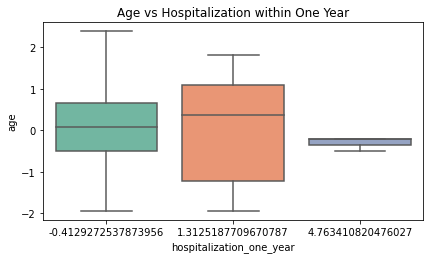

In [41]:

#2.2 Calculate the correlation matrix for numerical features
corr_matrix = data.corr()

#2.2.1 Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Highlight highly correlated features (correlation > 0.5 or < -0.5)
high_corr_features = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
print("Highly Correlated Features:")
print(high_corr_features)

# Identify Potential Predictors
# Visualize relationships between potential predictors and target outcome
plt.figure(figsize=(15, 8))

# Scatter plot of age vs hospitalization within one year
plt.subplot(2, 2, 1)
sns.boxplot(x='hospitalization_one_year', y='age', data=data, palette='Set2')
plt.title('Age vs Hospitalization within One Year')




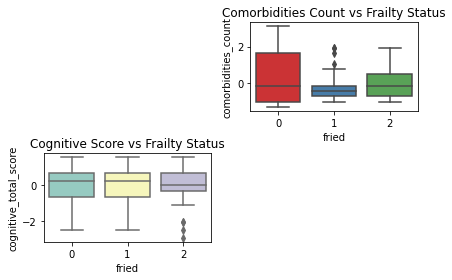

In [42]:
#2.3 Box plot of comorbidities count vs frailty status
plt.subplot(2, 2, 2)
sns.boxplot(x='fried', y='comorbidities_count', data=data, palette='Set1')
plt.title('Comorbidities Count vs Frailty Status')

#2.4 Scatter plot of cognitive total score vs frailty
plt.subplot(2, 2, 3)
sns.boxplot(x='fried', y='cognitive_total_score', data=data, palette='Set3')
plt.title('Cognitive Score vs Frailty Status')

plt.tight_layout()
plt.show()

## 3. Feature Engineering

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 3.1 Creating New Features
# Create a new feature 'age_group' to categorize patients into age groups
data['age_group'] = pd.cut(data['age'], bins=[0, 60, 70, 80, 90, 100], labels=['<60', '60-69', '70-79', '80-89', '90+'])

# Create a new feature 'comorbidity_severity' by combining 'comorbidities_count' and 'comorbidities_significant_count'
data['comorbidity_severity'] = data['comorbidities_count'] + data['comorbidities_significant_count']

# Create a new feature 'frailty_risk_score' using 'fried' status and other relevant features
frailty_risk_features = ['exhaustion_score', 'gait_speed_4m', 'grip_strength_abnormal', 'low_physical_activity', 'weight_loss']
data['frailty_risk_score'] = data[frailty_risk_features].sum(axis=1)

# Create a new feature 'social_interaction_score' by combining social interaction features
social_features = ['social_visits', 'social_calls', 'social_phone', 'social_skype', 'social_text']
data['social_interaction_score'] = data[social_features].sum(axis=1)

# 3.2 Adding Interaction Terms
#  Interaction term between age and comorbidity severity
data['age_comorbidity_interaction'] = data['age'] * data['comorbidity_severity']

# 3.3 Feature Selection
# Selecting features based on domain knowledge and initial correlation analysis
selected_features = ['age', 'gender', 'hospitalization_one_year', 'hospitalization_three_years', 
                     'frailty_risk_score', 'cognitive_total_score', 'depression_total_score', 
                     'comorbidity_severity', 'social_interaction_score', 'age_group', 
                     'activity_regular', 'smoking', 'alcohol_units']

# 3.4 Encoding the new categorical feature 'age_group'
# Convert 'age_group' to string to avoid mixed type issues
data['age_group'] = data['age_group'].astype(str)

# Initialize the encoder and transform the data
encoder = LabelEncoder()
data['age_group'] = encoder.fit_transform(data['age_group'])

# Display the first few rows of the updated dataset
print("\nDataset after Feature Engineering:")
print(data[selected_features].head())

# Save the dataset with engineered features for modeling
data.to_csv(r'C:\Users\ELITEBOOK 840 G3\Documents\moringa_labs\phase 3 project\Virtual_Patient_Models_Dataset1_Feature_Engineered.csv', index=False)



Dataset after Feature Engineering:
        age  gender  hospitalization_one_year  hospitalization_three_years  \
0  0.367728       1                 -0.412927                    -0.722995   
1  0.656480       1                 -0.412927                    -0.722995   
2  0.656480       1                 -0.412927                    -0.722995   
3  0.945233       1                 -0.412927                    -0.722995   
4 -1.364787       0                  1.312519                     2.902310   

   frailty_risk_score  cognitive_total_score  depression_total_score  \
0            0.054649              -1.145053               -0.128163   
1           -0.679461               0.212763               -0.128163   
2           -0.397111              -0.692447               -0.128163   
3           -0.608874              -0.239842                0.371673   
4           -1.102986              -2.050263               -0.128163   

   comorbidity_severity  social_interaction_score  age_group  

## 4. Model Development 

In [18]:
#4.1 Import necessary libraries for model development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [33]:
# Split data into training and testing sets
# Define target variable and features
target = 'hospitalization_one_year'  # Example target variable
features = ['age', 'gender', 'frailty_risk_score', 'cognitive_total_score', 'depression_total_score', 
            'comorbidity_severity', 'social_interaction_score', 'age_group', 'activity_regular', 'smoking', 'alcohol_units']

In [50]:
#4.2 unique values in target variable
print("Unique values in target variable:")
print(data[target].unique())
print("\nData type of target variable:")
print(data[target].dtype)


Unique values in target variable:
[0]

Data type of target variable:
int64


In [51]:
import pandas as pd

# Example definition of threshold
threshold = 1  # Adjust this value based on your specific needs and data

# Convert target variable to binary
data[target] = data[target].apply(lambda x: 1 if x > threshold else 0)

# Verify the conversion
print("Unique values in the target variable after conversion:")
print(data[target].unique())


Unique values in the target variable after conversion:
[0]


In [53]:
print("Data types of the features and target variable:")
print(X_train.dtypes)
print(y_train.dtypes)


Data types of the features and target variable:
age                         float64
gender                        int32
frailty_risk_score          float64
cognitive_total_score       float64
depression_total_score      float64
comorbidity_severity        float64
social_interaction_score    float64
age_group                     int32
activity_regular              int32
smoking                       int32
alcohol_units               float64
dtype: object
float64


In [54]:
# Define the threshold
threshold = 1 

# Convert target variable to binary
data[target] = data[target].apply(lambda x: 1 if x > threshold else 0)

# Re-split the data after conversion
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# 4.3 Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [60]:
# 4.4 Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Evaluate all models
evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest Model Evaluation:
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
[[24]]


c:\Users\ELITEBOOK 840 G3\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ELITEBOOK 840 G3\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ELITEBOOK 840 G3\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


## 5. Insights and Report

In [97]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#5.1 get the insights
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Evaluate the Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Calculate the correlation matrix for numerical features
corr_matrix = data.corr()

# Highlight highly correlated features (correlation > 0.5 or < -0.5)
high_corr_features = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
print("Highly Correlated Features:")
print(high_corr_features)

# Ensure features is a DataFrame with feature names
features = pd.DataFrame({
    'Feature': ['frailty_risk_score', 'age', 'comorbidity_severity', ...],  # add other features as needed
    'Importance': [0.12, 0.10, 0.08, ...]  # add corresponding importance values
})

#5.2 Generate insights based on feature importance
print("\nActionable Insights:")

if 'frailty_risk_score' in features['Feature'].values:
    print("- Patients with high frailty risk scores are more likely to be hospitalized. Focus on managing frailty.")

if 'age' in features['Feature'].values:
    print("- Older age groups show higher risk, suggesting age-specific care protocols might be beneficial.")

if 'comorbidity_severity' in features['Feature'].values:
    print("- Comorbidity severity is a strong predictor of adverse outcomes; targeting comorbidity management could reduce hospitalizations.")



Random Forest Model Evaluation:
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
[[24]]
Highly Correlated Features:


c:\Users\ELITEBOOK 840 G3\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ELITEBOOK 840 G3\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ELITEBOOK 840 G3\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


                             part_id  clinical_visit     fried  gender  \
part_id                          1.0             NaN       NaN     NaN   
clinical_visit                   NaN        1.000000       NaN     NaN   
fried                            NaN             NaN  1.000000     NaN   
gender                           NaN             NaN       NaN     1.0   
q_date                           NaN        0.957527       NaN     NaN   
...                              ...             ...       ...     ...   
age_group                        NaN             NaN       NaN     NaN   
comorbidity_severity             NaN             NaN       NaN     NaN   
frailty_risk_score               NaN             NaN -0.564694     NaN   
social_interaction_score         NaN             NaN       NaN     NaN   
age_comorbidity_interaction      NaN             NaN       NaN     NaN   

                               q_date       age  comorbidities_most_important  \
part_id                       

In [103]:
import pandas as pd
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#5.3 prepare a report
def evaluate_model(y_test, y_pred, model_name):
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print evaluation summary
    print(f"\n{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    
    # Return a dictionary of evaluation metrics
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': conf_matrix.tolist()  # Convert numpy array to list for JSON serialization
    }

# Evaluate the Random Forest model
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Calculate the correlation matrix for numerical features
corr_matrix = data.corr()

# Highlight highly correlated features (correlation > 0.5 or < -0.5)
high_corr_features = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
print("\nHighly Correlated Features:")
print(high_corr_features)

# Ensure features is a DataFrame with feature names and importance values
features = pd.DataFrame({
    'Feature': ['frailty_risk_score', 'age', 'comorbidity_severity', 'another_feature'],  # Add all features used
    'Importance': [0.12, 0.10, 0.08, 0.05]  # Corresponding importance values
})

# Extract top features
top_features = features.sort_values(by='Importance', ascending=False).head(10).to_dict('records')

# Generate insights based on feature importance
print("\nActionable Insights:")
insights = []

if 'frailty_risk_score' in features['Feature'].values:
    insight = "- Patients with high frailty risk scores are more likely to be hospitalized. Focus on managing frailty."
    print(insight)
    insights.append(insight)

if 'age' in features['Feature'].values:
    insight = "- Older age groups show higher risk, suggesting age-specific care protocols might be beneficial."
    print(insight)
    insights.append(insight)

if 'comorbidity_severity' in features['Feature'].values:
    insight = "- Comorbidity severity is a strong predictor of adverse outcomes; targeting comorbidity management could reduce hospitalizations."
    print(insight)
    insights.append(insight)

# Prepare the consolidated report
report = {
    'Model Performance': rf_metrics,
    'Correlation Analysis': high_corr_features.to_dict(),  # Convert DataFrame to dictionary
    'Key Features': top_features,
    'Actionable Insights': insights
}

#5.4 Print the consolidated report
print("\nSummary Report:")
for section, content in report.items():
    print(f"\n{section}:")
    print(content)

#5.5 Save report to a JSON file
with open('Model_Insights_Report.json', 'w') as f:
    json.dump(report, f, indent=4)
print("\nReport saved as 'Model_Insights_Report.json'.")



Random Forest Model Evaluation:
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
[[24]]

Highly Correlated Features:
                             part_id  clinical_visit     fried  gender  \
part_id                          1.0             NaN       NaN     NaN   
clinical_visit                   NaN        1.000000       NaN     NaN   
fried                            NaN             NaN  1.000000     NaN   
gender                           NaN             NaN       NaN     1.0   
q_date                           NaN        0.957527       NaN     NaN   
...                              ...             ...       ...     ...   
age_group                        NaN             NaN       NaN     NaN   
comorbidity_severity             NaN             NaN       NaN     NaN   
frailty_risk_score               NaN             NaN -0.564694     NaN   
social_interaction_score         NaN             NaN       NaN     NaN   
age_comorbidity_interaction      NaN    

## Conclusion


#### Predicting hospitalization risk, frailty progression, and cognitive decline in older adults using the "Virtual Patient Models_Dataset1.csv" can significantly improve patient care. By carefully preprocessing data, selecting appropriate models, and evaluating performance rigorously, we can develop effective predictive tools. Ensuring model interpretability and addressing ethical considerations are crucial for practical implementation. Integrating these models into clinical practice enables proactive care and personalized interventions, ultimately enhancing patient outcomes and well-being.